----------------------------------------------------------------
 ### **0. Data Ingestion, Preliminary Data Analysis**
 ---------------------------------------------------------------

In [1]:
%%capture
%pip install seaborn matplotlib

In [ ]:
# importing all necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
# reading the red wine csv_file and separating with a ;
red_wine = pd.read_csv("winequality-red.csv", sep=';')

In [7]:
# previewing the first 5 rows
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# checking teh column names in the data
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# checking the numerical columns of the data
num_features = red_wine.select_dtypes(include=["int64", "float64"]).columns
num_features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
# getting the description of the numerical column and transposing the data
red_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
# checking thge number of unique values
red_wine.quality.unique(
    
)

array([5, 6, 7, 4, 8, 3])

| Numeric | Category   | Meaning               |
| ------- | ---------- | --------------------- |
| 3–4     | **Low**    | Poor quality wines    |
| 5–6     | **Medium** | Average/typical wines |
| 7–8+    | **High**   | Premium-quality wines |


In [14]:
# function to map aand determine the red_wine quality
def map_quality_category(x):
    if x<= 4:
        return "Low"
    elif x >= 6:
      return "Medium"
    else:
        return "High"

In [ ]:
# applying the function 
red_wine["quality_label"] = red_wine["quality"].apply(map_quality_category)

In [ ]:
# checking the new column adddes
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,High


In [19]:
# making a copy of the data to continue analysis
red_data = red_wine.copy()
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,High
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,High
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,High
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,High
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,High


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [29]:
def univariate_numerical(red_data,column):
    """
    Performs univariate EDA on a single numerical columns.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot
    """
    
    print(f"Feature: {column}")
    print("="*40)
    print(red_data[column].describe().to_frame())
    print(f"\nSkewness: {red_data[column].skew():.3f}")
    print(f"Kurtosis:{red_data[column].kurt():.3f}")
    
    
    plt.figure(figsize = (12, 4))
    
    # histogram + KDE
    plt.subplot(1, 2,1)
    sns.histplot(red_data[column], kde=True, bins = 30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize = 13)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
       # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=red_data[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(red_data[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(red_data[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis:1.132


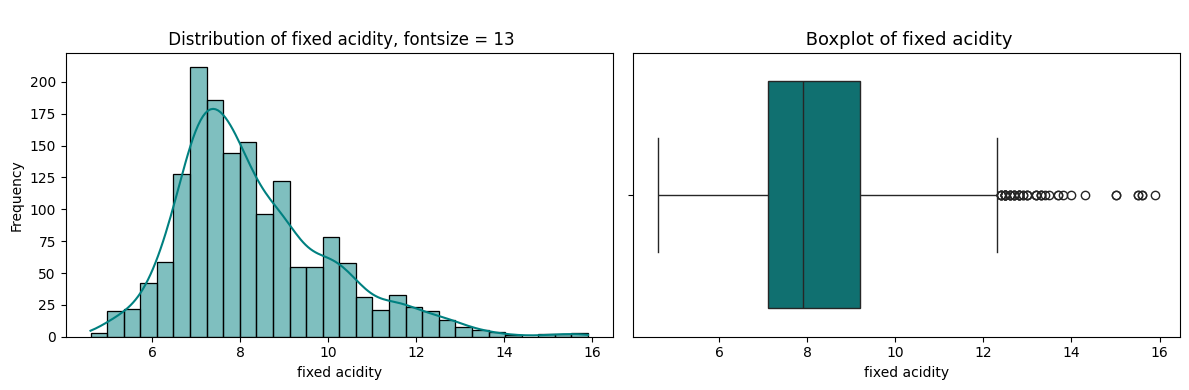

fixed acidity is moderately skewed.


In [27]:
univariate_numerical(red_data,"fixed acidity")

Feature: pH
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis:0.807


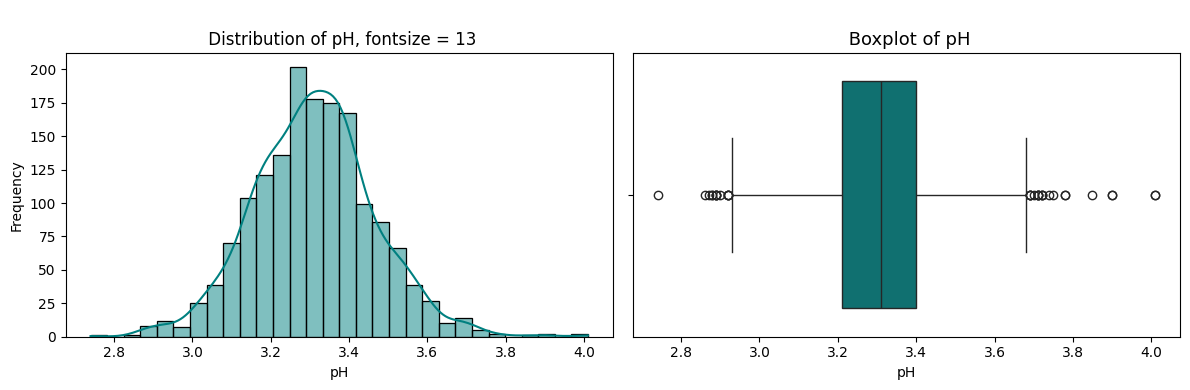

pH is fairly symmetric.


In [28]:
univariate_numerical(red_data,"pH")

In [30]:
# looping through all the column to save time

Feature: fixed acidity
       fixed acidity
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000

Skewness: 0.983
Kurtosis:1.132


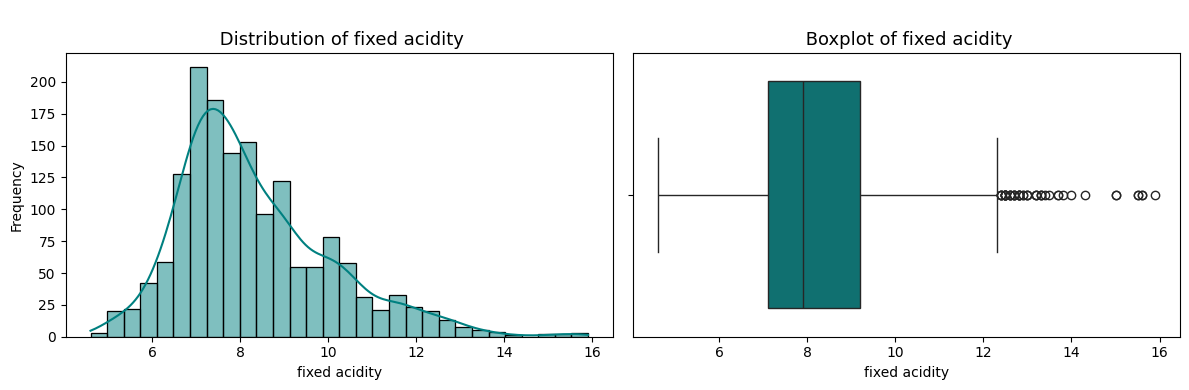

fixed acidity is moderately skewed.
Feature: volatile acidity
       volatile acidity
count       1599.000000
mean           0.527821
std            0.179060
min            0.120000
25%            0.390000
50%            0.520000
75%            0.640000
max            1.580000

Skewness: 0.672
Kurtosis:1.226


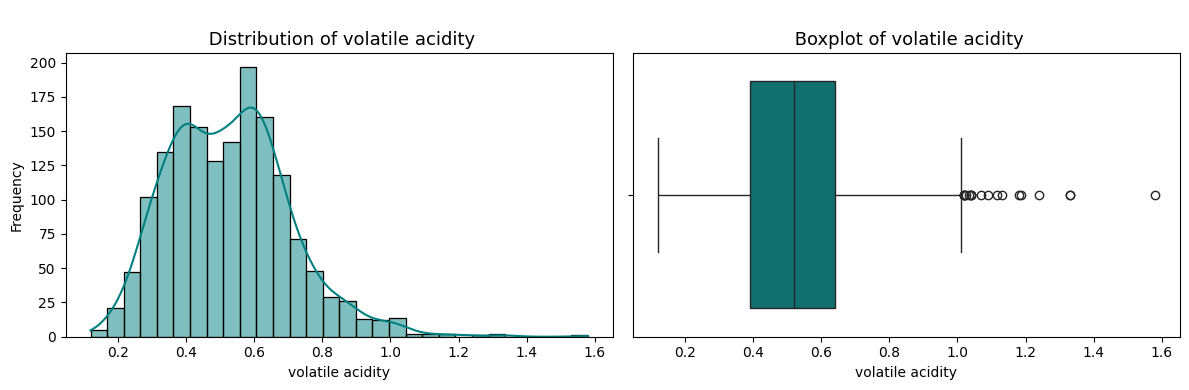

volatile acidity is moderately skewed.
Feature: citric acid
       citric acid
count  1599.000000
mean      0.270976
std       0.194801
min       0.000000
25%       0.090000
50%       0.260000
75%       0.420000
max       1.000000

Skewness: 0.318
Kurtosis:-0.789


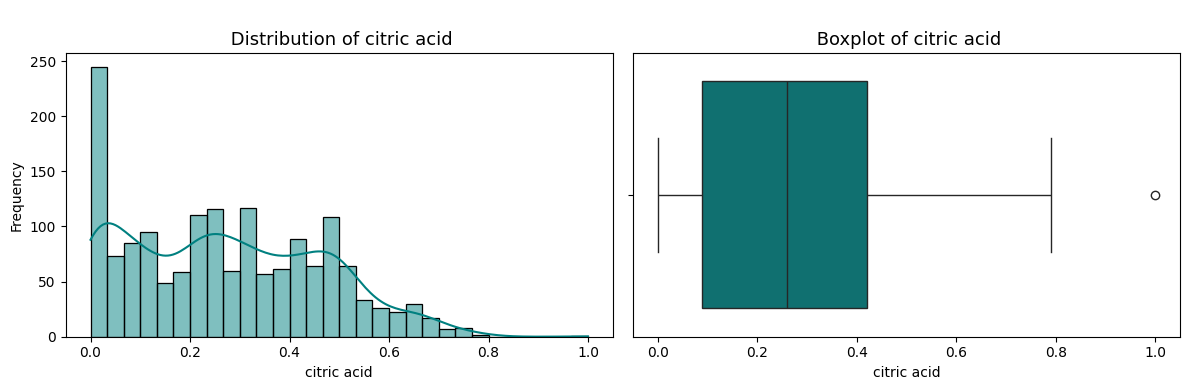

citric acid is fairly symmetric.
Feature: residual sugar
       residual sugar
count     1599.000000
mean         2.538806
std          1.409928
min          0.900000
25%          1.900000
50%          2.200000
75%          2.600000
max         15.500000

Skewness: 4.541
Kurtosis:28.618


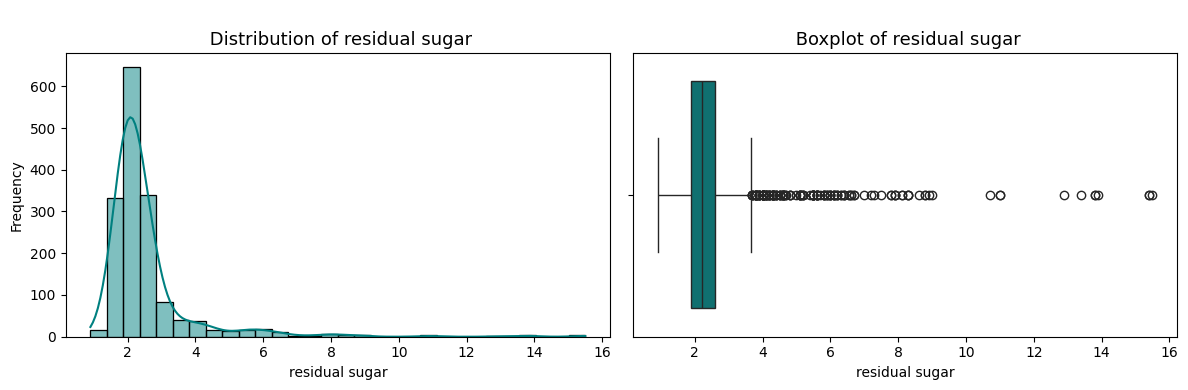


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
Feature: chlorides
         chlorides
count  1599.000000
mean      0.087467
std       0.047065
min       0.012000
25%       0.070000
50%       0.079000
75%       0.090000
max       0.611000

Skewness: 5.680
Kurtosis:41.716


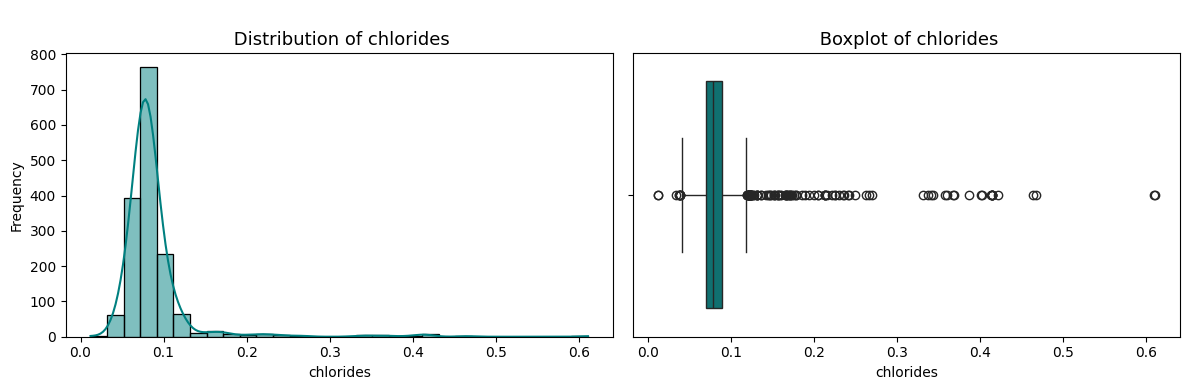


 chlorides is highly skewed. Consider log or Box-Cox transformation.
Feature: free sulfur dioxide
       free sulfur dioxide
count          1599.000000
mean             15.874922
std              10.460157
min               1.000000
25%               7.000000
50%              14.000000
75%              21.000000
max              72.000000

Skewness: 1.251
Kurtosis:2.024


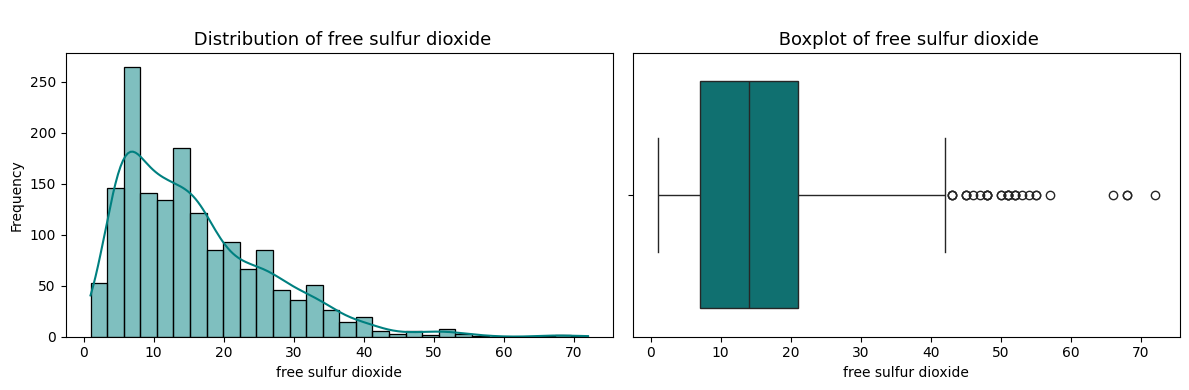


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: total sulfur dioxide
       total sulfur dioxide
count           1599.000000
mean              46.467792
std               32.895324
min                6.000000
25%               22.000000
50%               38.000000
75%               62.000000
max              289.000000

Skewness: 1.516
Kurtosis:3.810


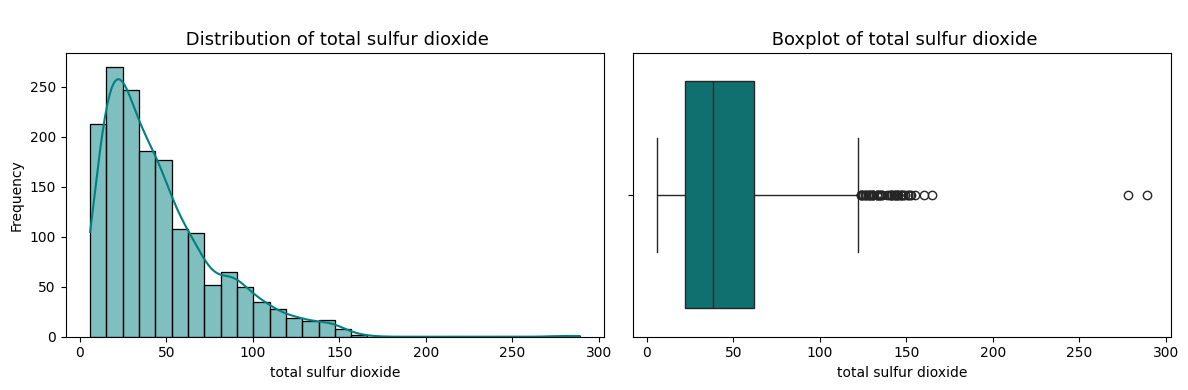


 total sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: density
           density
count  1599.000000
mean      0.996747
std       0.001887
min       0.990070
25%       0.995600
50%       0.996750
75%       0.997835
max       1.003690

Skewness: 0.071
Kurtosis:0.934


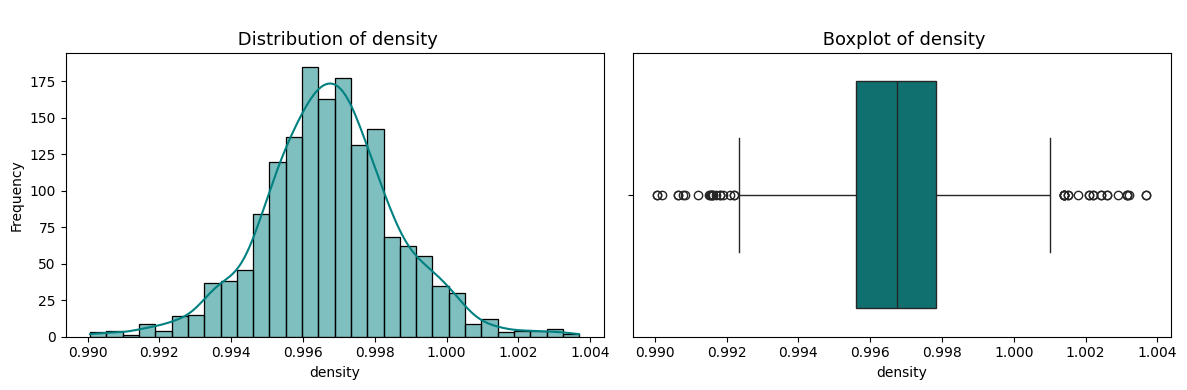

density is fairly symmetric.
Feature: pH
                pH
count  1599.000000
mean      3.311113
std       0.154386
min       2.740000
25%       3.210000
50%       3.310000
75%       3.400000
max       4.010000

Skewness: 0.194
Kurtosis:0.807


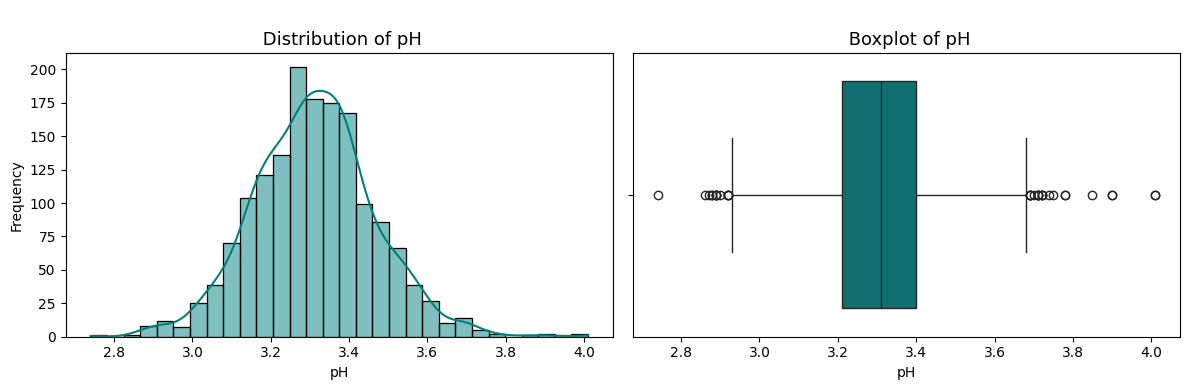

pH is fairly symmetric.
Feature: sulphates
         sulphates
count  1599.000000
mean      0.658149
std       0.169507
min       0.330000
25%       0.550000
50%       0.620000
75%       0.730000
max       2.000000

Skewness: 2.429
Kurtosis:11.720


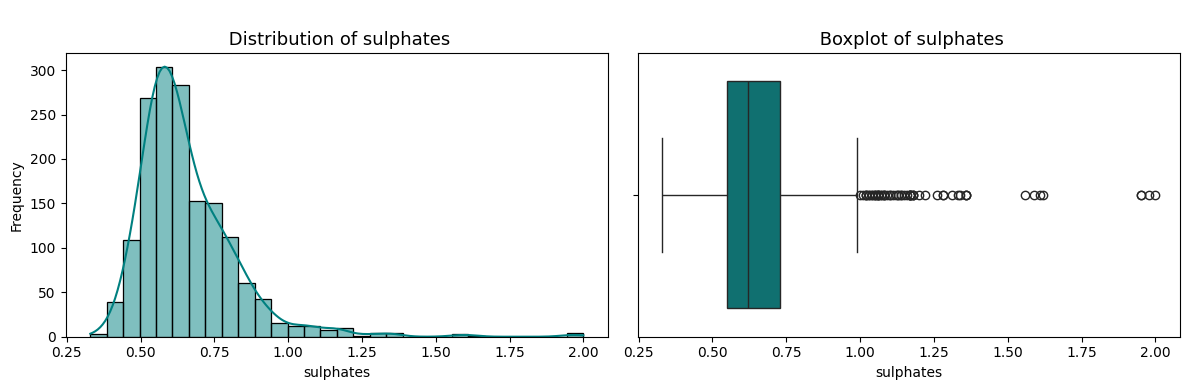


 sulphates is highly skewed. Consider log or Box-Cox transformation.
Feature: alcohol
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000

Skewness: 0.861
Kurtosis:0.200


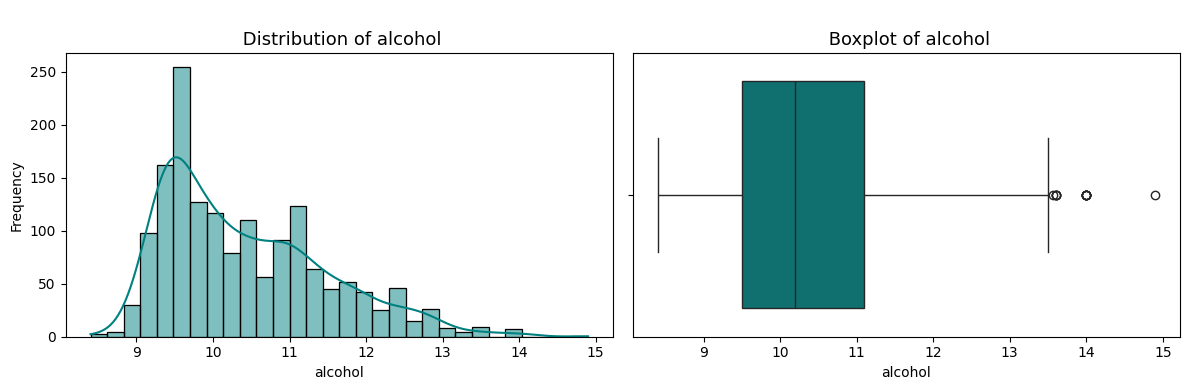

alcohol is moderately skewed.
Feature: quality
           quality
count  1599.000000
mean      5.636023
std       0.807569
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       8.000000

Skewness: 0.218
Kurtosis:0.297


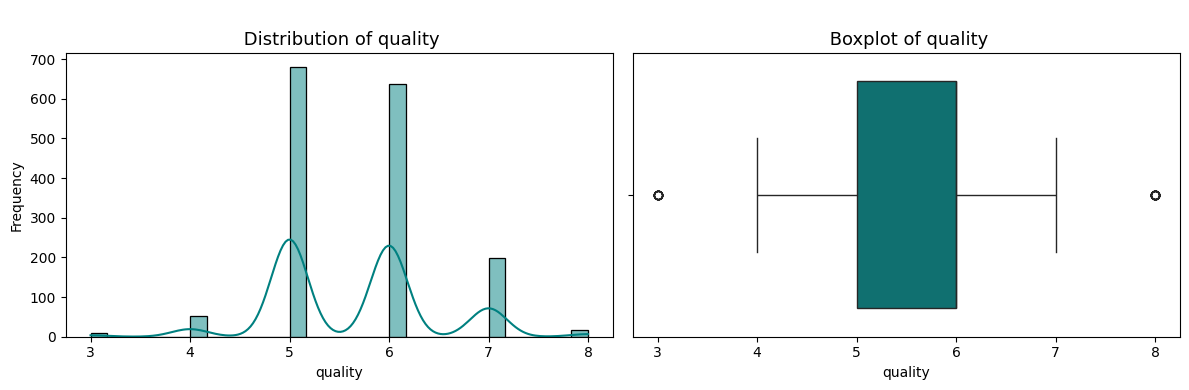

quality is fairly symmetric.


In [33]:
for col in num_features:
    univariate_numerical(red_data, col)

In [43]:

def univariate_categorical_eda(red_data, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = red_data[column].value_counts()
    prop =red_data[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=red_data, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(red_data[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()


In [35]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [36]:

red_wine["quality_label"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium           855       53.47
High             681       42.59
Low               63        3.94



C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\2392250638.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=red_data, palette='Set2', order=freq.index,color='teal')


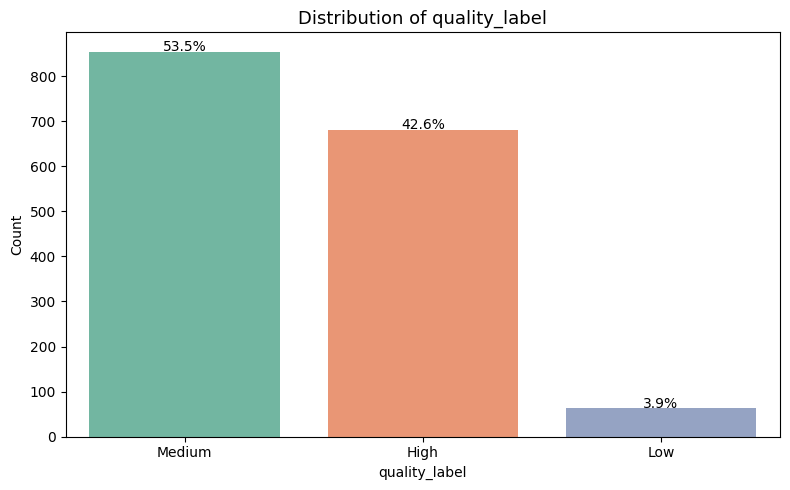

In [44]:
univariate_categorical_eda(red_wine,"quality_label" )

**Key Univariate Findings**

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`volatile acidity`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |



**Lets start our bivariate analysis**

We can go about it this way, for the sake of simplicity

| Level                      | Focus                        | Techniques / Tools                                   |
| -------------------------- | ---------------------------- | ---------------------------------------------------- |
| **1. Numeric–Numeric**     | Correlation and scatterplots | `.corr()`, `sns.heatmap()`, `sns.scatterplot()`      |
| **2. Numeric–Categorical** | Feature vs `quality_label`   | `sns.boxplot()`, `sns.violinplot()`, group summaries |



In [45]:
num_features = red_wine.select_dtypes(include=["int64", "float64"]).columns

In [46]:
# convert to dataframe

num_features = pd.DataFrame(red_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


1. Numeric to Numeric

Correlation with target

In [53]:
def correlation_with_target(red_data, target_col, figsize =(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # keeping only numeric columns
    numeric_data = red_data.select_dtypes(include = "number").copy()
    if target_col not in numeric_data.columns:
        raise ValueError(f"Target column'{target_col}' must be numeric and present in the dataframe.")
    corrs = numeric_data.corrwith(numeric_data[target_col]).drop(target_col)
    
    corrs_df = corrs.to_frame(name="corr").T
    
    plt.figure(figsize = figsize)
    sns.heatmap(
        corrs_df,
        annot = True,
        fmt=".3f",
        cmap = "coolwarm",
        center = 0,
        vmin = -1,
        vmax = 1,
        cbar_kws={"orientation":"vertical", "shrink": 0.7}
    )
    
    plt.xticks(rotation = 45, ha="right")
    plt.yticks([0], [target_col], rotation = 0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize = 12)
    plt.tight_layout()
    plt.show()
    
    # return sortes correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending = False).index)

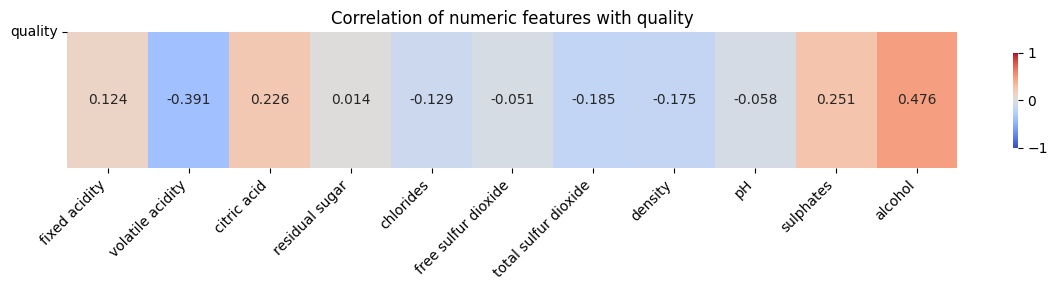

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
dtype: float64


In [61]:
corr_series= correlation_with_target(red_data, "quality", figsize =(12,3))
print(corr_series)

| Feature                  | Correlation | Interpretation                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **alcohol**              | +0.48       | Strongest positive — higher alcohol → higher quality. Likely a key predictive feature.              |
| **volatile acidity**     | −0.39       | Strong negative — too much volatility (vinegar-like taste) reduces quality. Very important feature. |
| **sulphates**            | +0.25       | Moderate positive — contributes to stability and aroma. Helpful but secondary predictor.            |
| **citric acid**          | +0.23       | Slightly positive — adds freshness; balanced wines score higher.                                    |
| **total sulfur dioxide** | −0.19       | Too much preservation reduces quality.                                                              |
| **density**              | −0.17       | Lower density wines (lighter, less sugar) tend to score higher.                                     |
| **chlorides**            | −0.13       | Saltier taste lowers quality.                                                                       |
| **fixed acidity**        | +0.12       | Minor positive — balanced acidity helps.                                                            |
| **pH**                   | −0.06       | Weak negative; higher pH (less acidic) slightly lowers quality.                                     |
| **free sulfur dioxide**  | −0.05       | Minimal linear relationship.                                                                        |
| **residual sugar**       | +0.01       | Negligible — sweetness isn’t driving quality here.                                                  |


**How does this help our model**

| Action                                                     | Explanation                                                                                              |
| ---------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Keep alcohol, volatile acidity, sulphates, citric acid** | Strong predictors. You’ll definitely include them.                                                       |
| **Be cautious with total sulfur dioxide & density**        | Moderate effect; consider non-linear relationships or transformations.                                   |
| **Residual sugar, free SO₂**                               | Probably drop unless domain reasoning suggests otherwise.                                                |
| **Interactions to test:**                                  | `alcohol * acidity`, `citric acid * sulphates`, or `density * pH` — may capture subtle combined effects. |


In [67]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(red_data, x_col,y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
    #calculating the correlation coefficient
    corr, p_value = pearsonr(red_data[x_col],red_data[y_col]) 

    # create plot
    plt.figure(figsize = (8,5))
    sns.regplot(data= red_data, x=x_col, y=y_col, scatter_kws={"alpha": 0.5}, line_kws={"color":"red"})

    # title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation:{corr:.3f} (p={p_value:.3f})", fontsize = 13)
    plt.xlabel(x_col, fontsize = 11)
    plt.ylabel(y_col, fontsize = 11)
    plt.grid(alpha=0.3)
    plt.show()
    

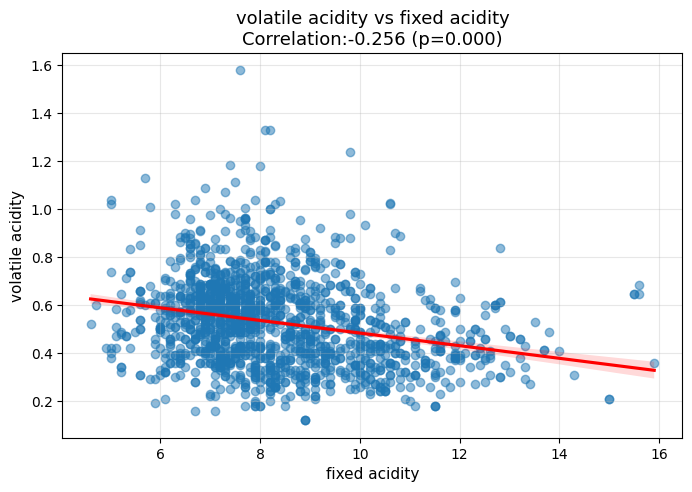

In [68]:
numeric_bivariate_plot(red_data, 'fixed acidity', 'volatile acidity')

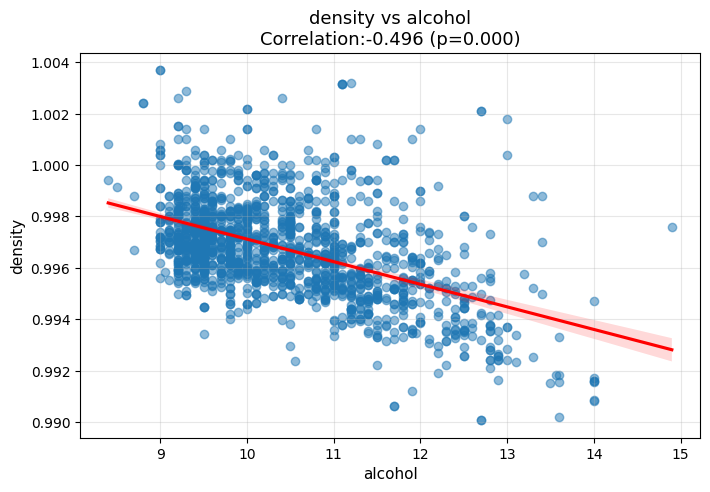

In [70]:
numeric_bivariate_plot(red_data, 'alcohol', 'density')

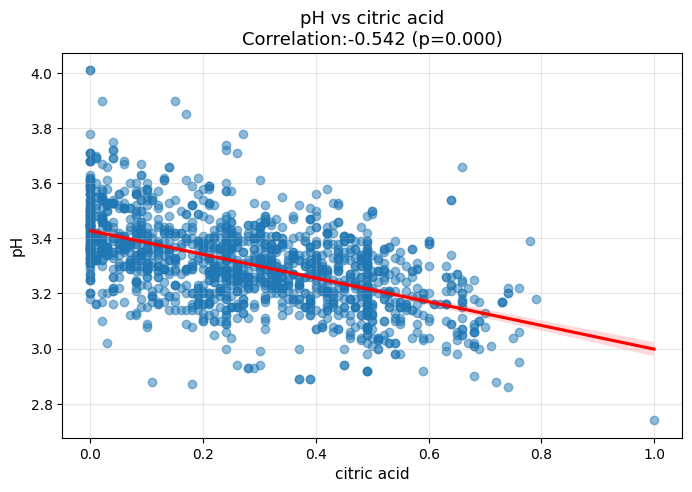

In [71]:
numeric_bivariate_plot(red_data, 'citric acid', 'pH')

**Task**
Answer the following questions
1. Run for the rest of the features

2. After each plot, ask

- Does the red regression line slope upward or downward?

- Are points tightly packed around the line or scattered widely?

- Are there outliers pulling the line?


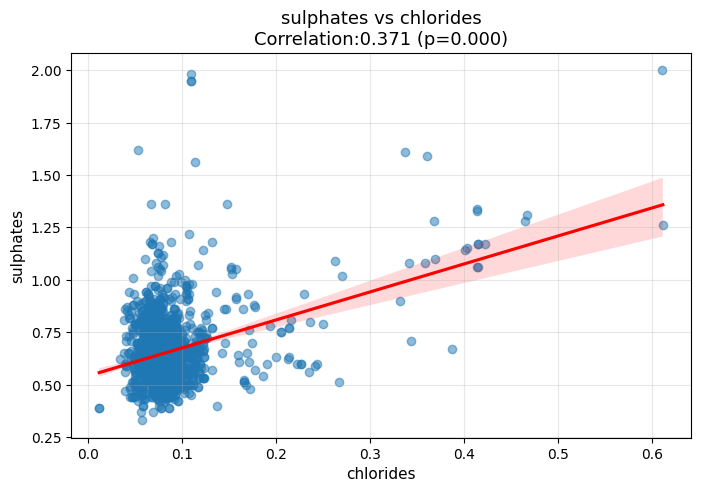

In [73]:
numeric_bivariate_plot(red_data, 'chlorides', 'sulphates')

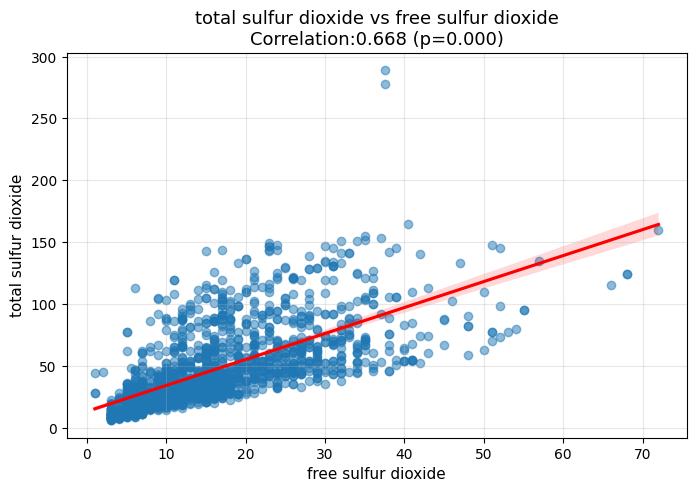

In [75]:
numeric_bivariate_plot(red_data, 'free sulfur dioxide', 'total sulfur dioxide')

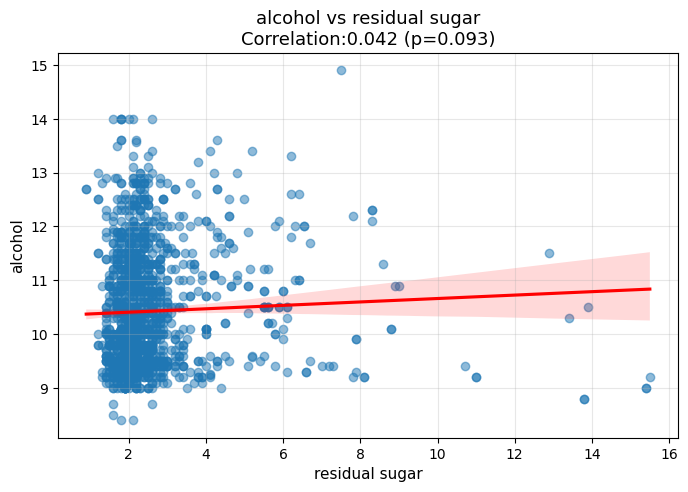

In [76]:
numeric_bivariate_plot(red_data, 'residual sugar', 'alcohol')

**Numeric–Categorical (Feature vs Target)**

In [80]:
def bivariate_num_cat(red_data, feature, target = "quality_label"):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f"Feature:{feature} vs {target}")
    print("=" * 50)
    
    # group summary
    summary = red_data.groupby(target)[feature].describe()[["mean", 'std',"min","max"]]
    print(summary)
    
    # boxplot + mean line
    sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")
    plt.title(f"{feature} across {target} categories",fontsize = 13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    
    
    # violin plot for distribution shape
    plt.figure(figsize = (10, 5))
    sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")
    plt.title(f"{feature} distribution by {target}", fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    

In [77]:
red_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

Feature:fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           8.167254  1.563988  5.0  15.9
Low            7.871429  1.649284  4.6  12.5
Medium         8.474035  1.862795  4.7  15.6


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


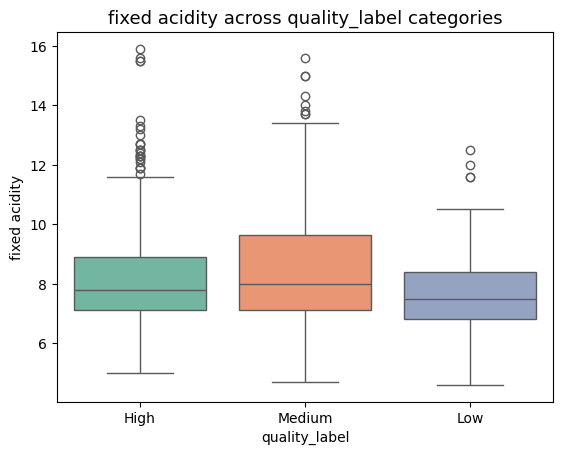

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


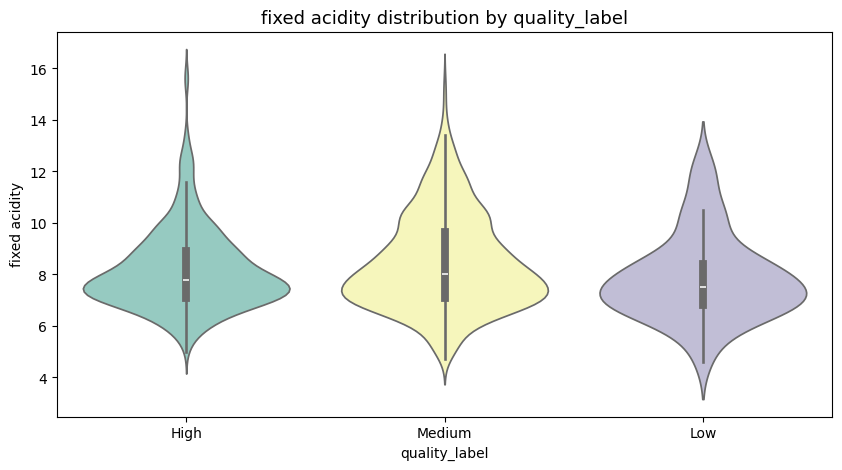

In [81]:
bivariate_num_cat(red_wine, "fixed acidity", target='quality_label')

Feature:fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           8.167254  1.563988  5.0  15.9
Low            7.871429  1.649284  4.6  12.5
Medium         8.474035  1.862795  4.7  15.6


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


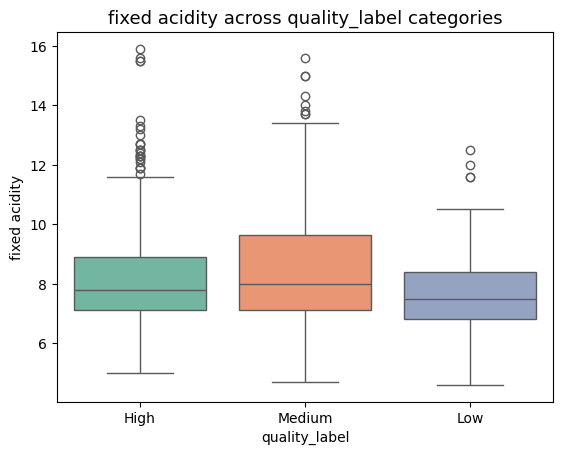

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


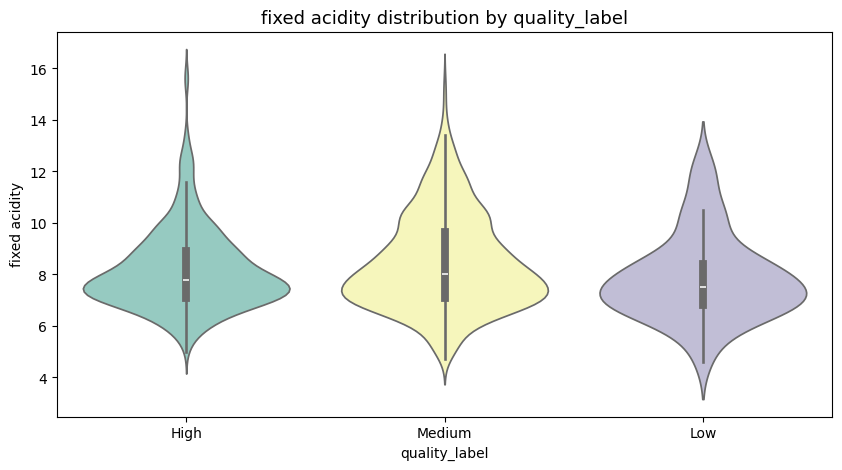

Feature:volatile acidity vs quality_label
                   mean       std   min   max
quality_label                                
High           0.577041  0.164801  0.18  1.33
Low            0.724206  0.247970  0.23  1.58
Medium         0.474146  0.161999  0.12  1.04


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


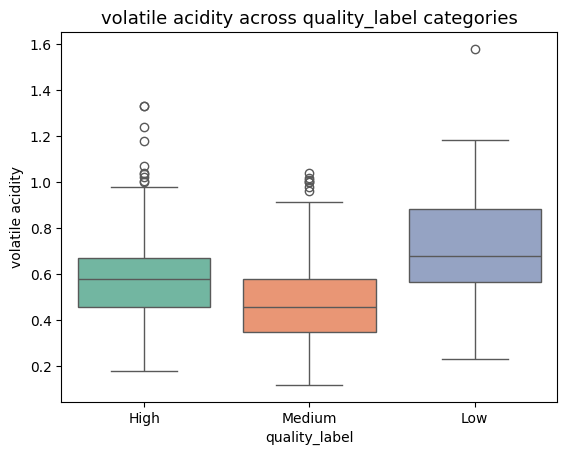

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


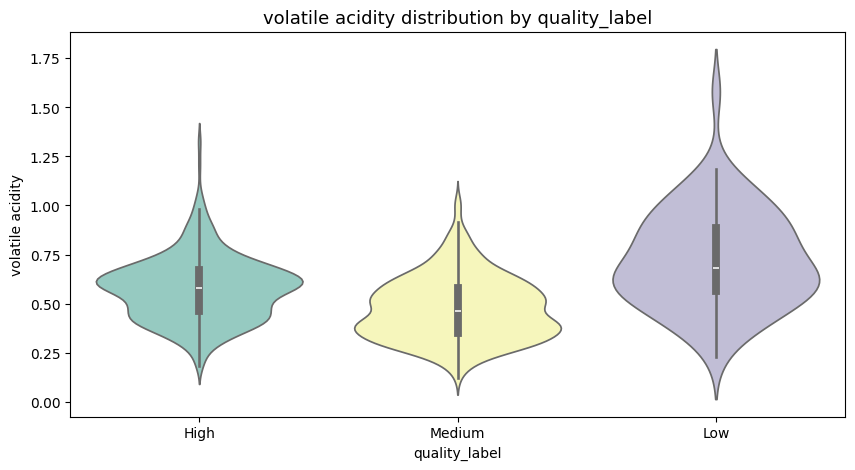

Feature:citric acid vs quality_label
                   mean       std  min   max
quality_label                               
High           0.243686  0.180003  0.0  0.79
Low            0.173651  0.207406  0.0  1.00
Medium         0.299883  0.199889  0.0  0.78


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


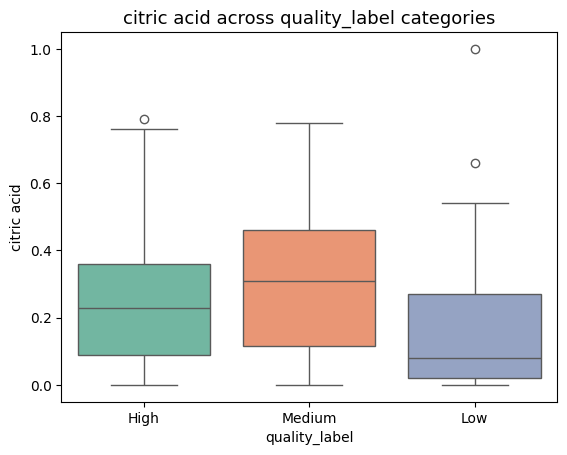

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


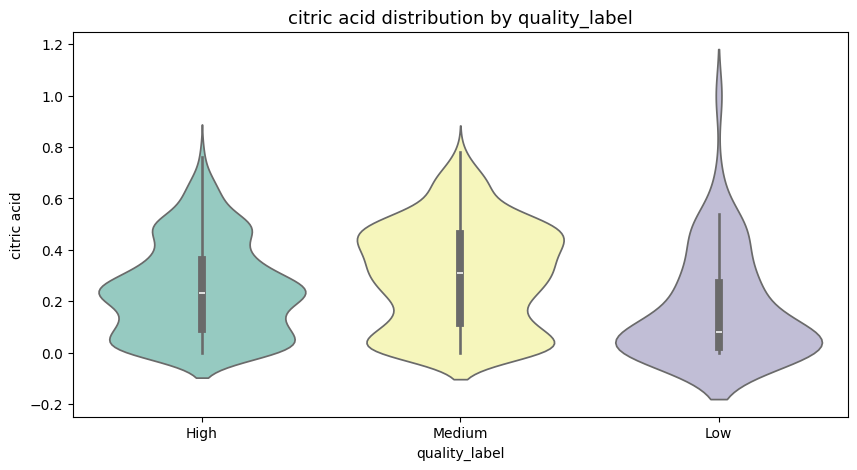

Feature:residual sugar vs quality_label
                   mean       std  min   max
quality_label                               
High           2.528855  1.359753  1.2  15.5
Low            2.684921  1.723735  1.2  12.9
Medium         2.535965  1.424835  0.9  15.4


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


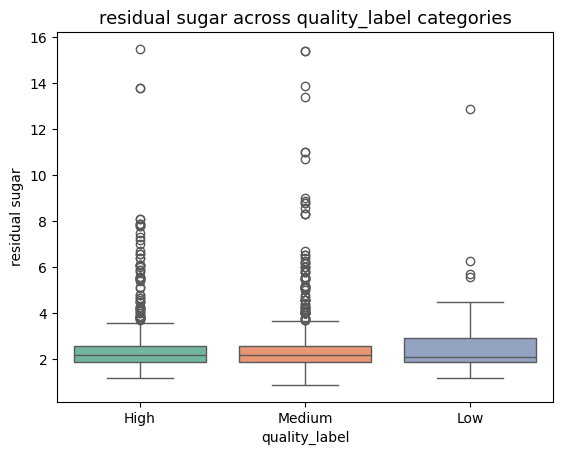

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


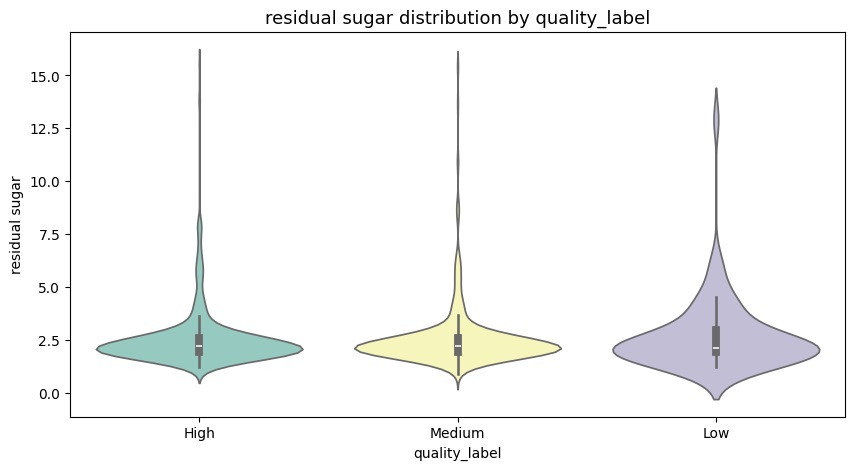

Feature:chlorides vs quality_label
                   mean       std    min    max
quality_label                                  
High           0.092736  0.053707  0.039  0.611
Low            0.095730  0.075121  0.045  0.610
Medium         0.082661  0.037258  0.012  0.415


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


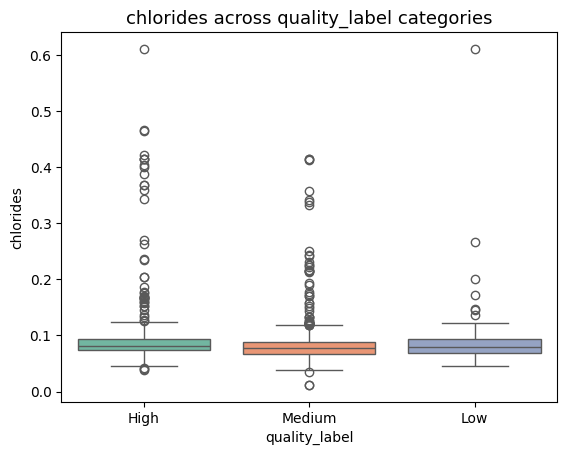

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


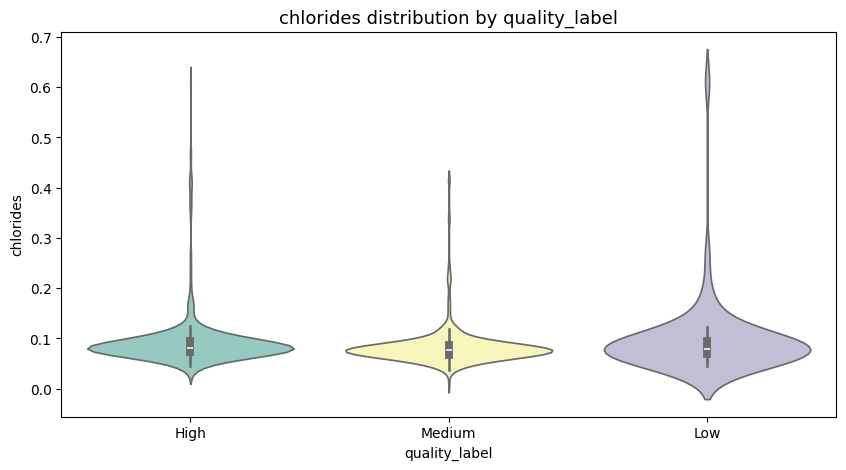

Feature:free sulfur dioxide vs quality_label
                    mean        std  min   max
quality_label                                 
High           16.983847  10.955446  3.0  68.0
Low            12.063492   9.076508  3.0  41.0
Medium         15.272515  10.038538  1.0  72.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


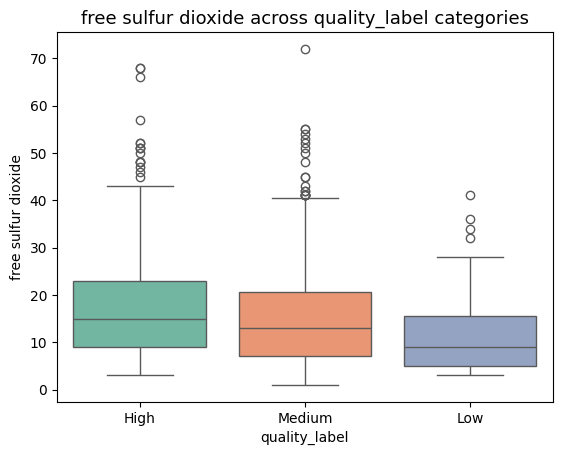

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


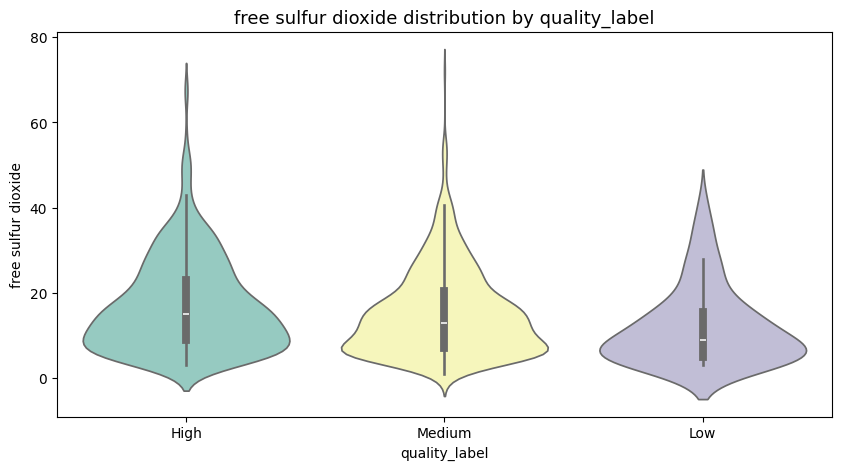

Feature:total sulfur dioxide vs quality_label
                    mean        std  min    max
quality_label                                  
High           56.513950  36.993116  6.0  155.0
Low            34.444444  26.395123  7.0  119.0
Medium         39.352047  27.253280  6.0  289.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


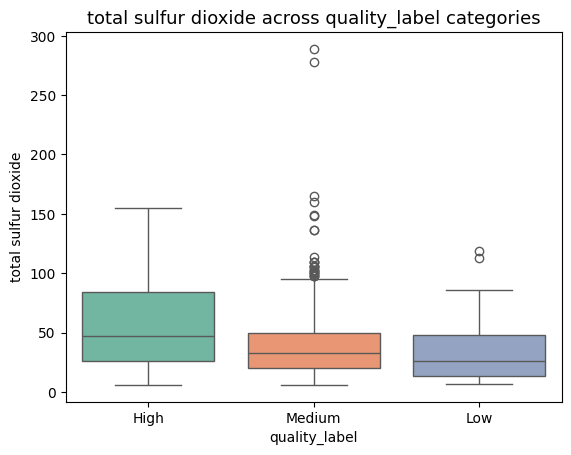

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


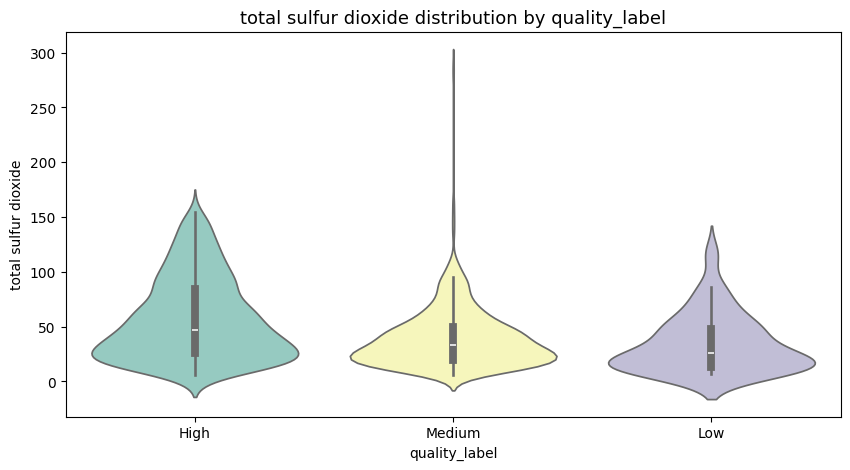

Feature:density vs quality_label
                   mean       std      min      max
quality_label                                      
High           0.997104  0.001589  0.99256  1.00315
Low            0.996689  0.001667  0.99340  1.00100
Medium         0.996467  0.002067  0.99007  1.00369


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


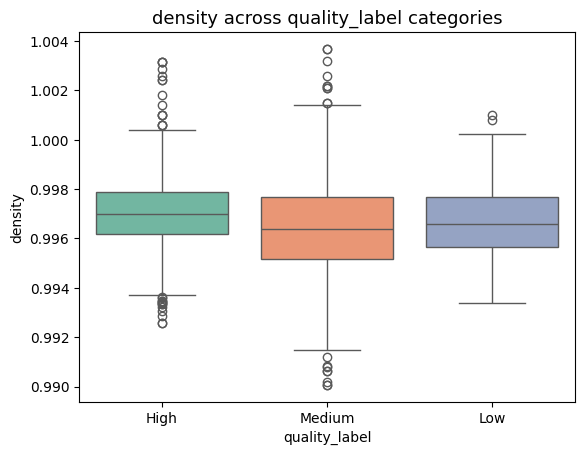

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


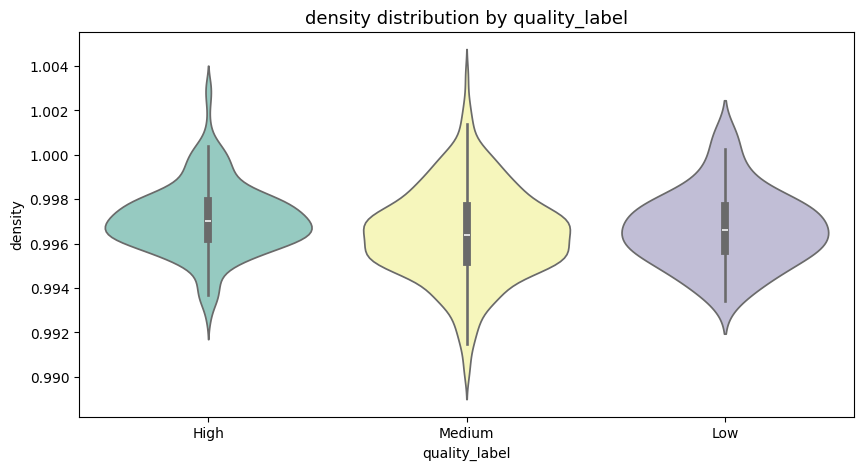

Feature:pH vs quality_label
                   mean       std   min   max
quality_label                                
High           3.304949  0.150618  2.88  3.74
Low            3.384127  0.175100  2.74  3.90
Medium         3.310643  0.154554  2.86  4.01


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


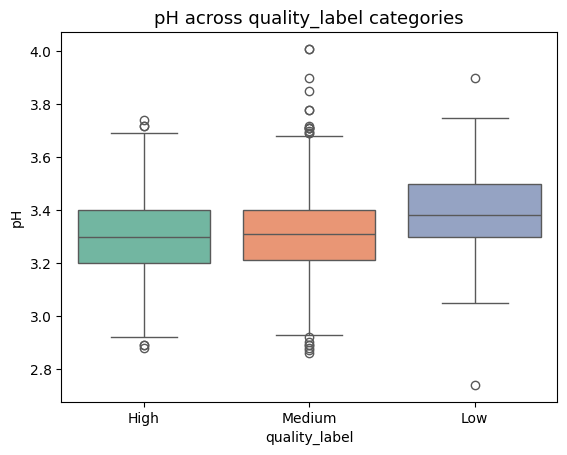

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


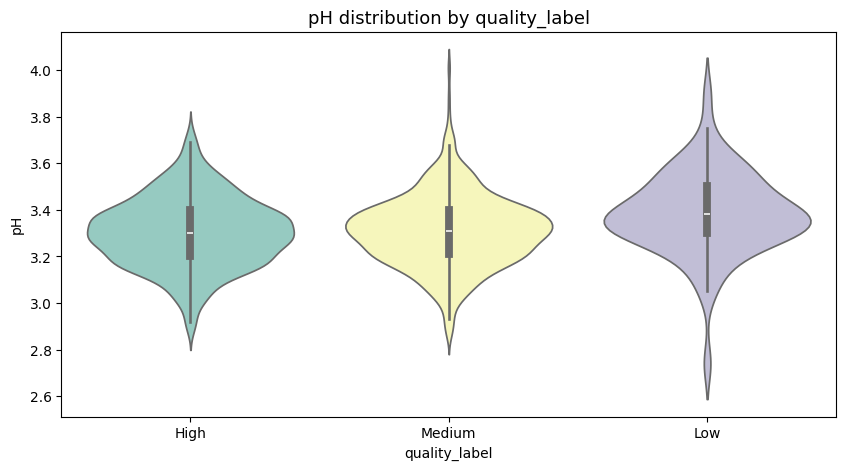

Feature:sulphates vs quality_label
                   mean       std   min   max
quality_label                                
High           0.620969  0.171062  0.37  1.98
Low            0.592222  0.224323  0.33  2.00
Medium         0.692620  0.155558  0.39  1.95


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


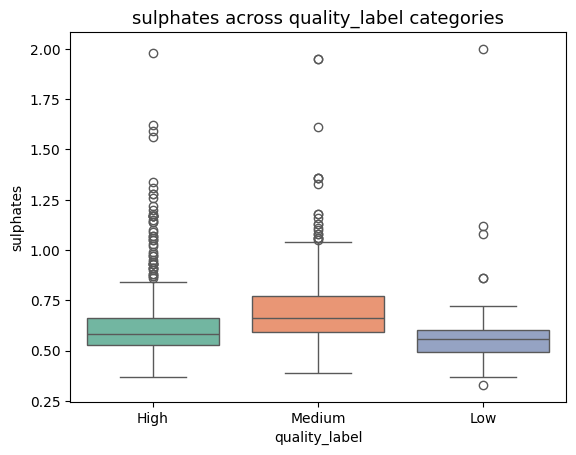

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


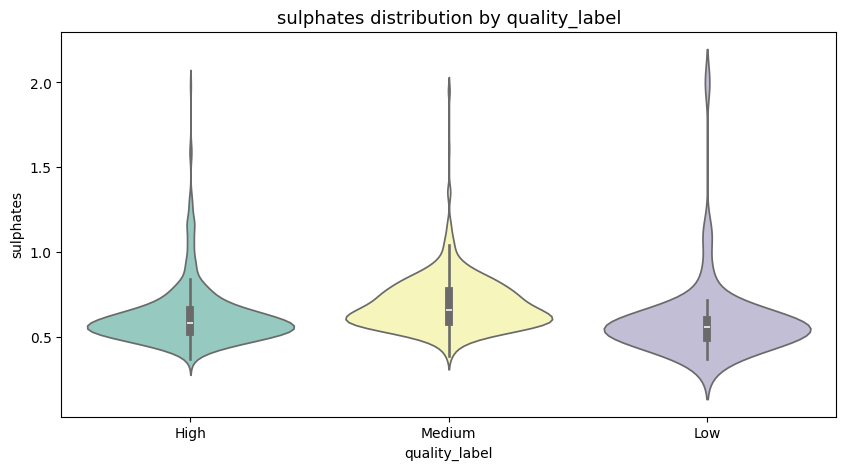

Feature:alcohol vs quality_label
                    mean       std  min   max
quality_label                                
High            9.899706  0.736521  8.5  14.9
Low            10.215873  0.918178  8.4  13.1
Medium         10.855029  1.106109  8.4  14.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


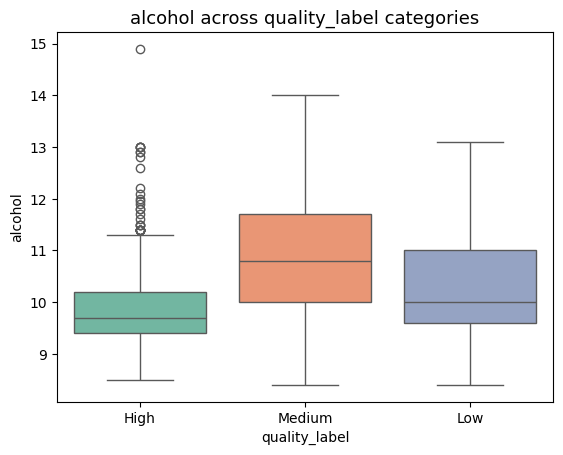

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


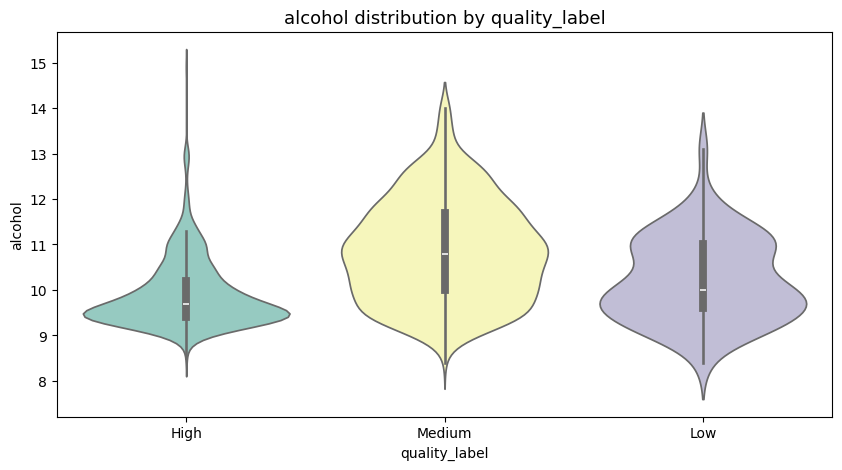

Feature:quality vs quality_label
                   mean       std  min  max
quality_label                              
High           5.000000  0.000000  5.0  5.0
Low            3.841270  0.368359  3.0  4.0
Medium         6.274854  0.491627  6.0  8.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=red_data, palette="Set2")


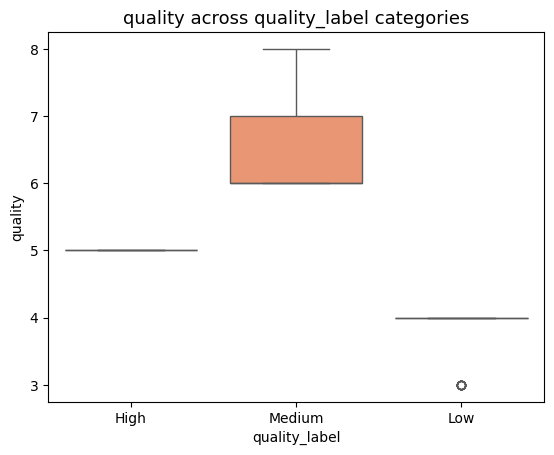

C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_4724\3068815060.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=red_data, palette ="Set3")


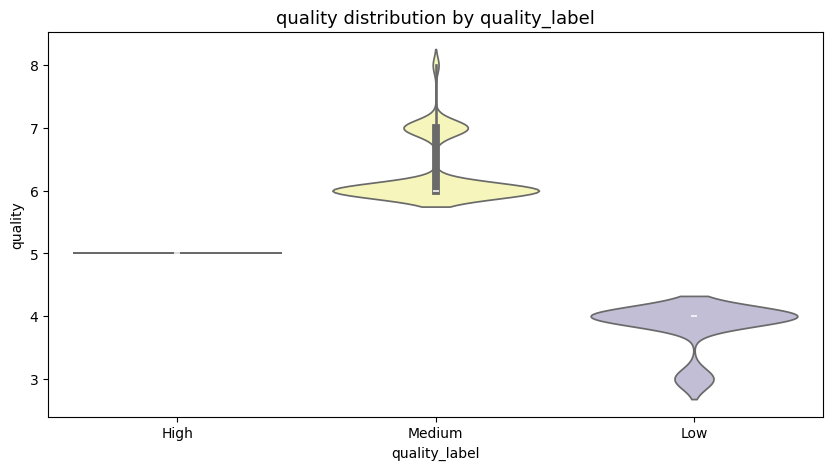

In [82]:
# lets apply our function using loops
for col in num_features:
    bivariate_num_cat(red_wine, col, target='quality_label')

**Median trend in the boxplot**

The median fixed acidity increases slightly from Low to Medium to High quality wines. This suggests that wines with higher fixed acidity tend to have better quality (up to a point).

**Distribution trend in the violin plot**

The violin plot shows how fixed acidity is distributed across Low, Medium, and High quality wines.

- The High-quality wines have a wider and slightly higher concentration of fixed acidity values around 8–10, suggesting that better wines often contain moderately higher acidity levels.

- The Medium-quality wines show a tight, dense cluster around 7–8, meaning most wines in this group share similar acidity levels.

- The Low-quality wines also cluster near 7, but their distribution is narrower, showing less variation in acidity.

In summary, the shape of the violins shows that while acidity tends to increase with wine quality, there is considerable overlap between categories — indicating that acidity alone may not be enough to distinguish wine quality perfectly.